In [292]:
#Let's import the Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [293]:
# Example
# Converts to log1p(count)
# Print original count back using expm1
print('Test log and exp')
test_count = 100
print('original value', test_count)
x = np.log1p(test_count) # log (x+1)
print('log1p', x)
print('expm1', np.expm1(x)) # exp(x) - 1

Test log and exp
original value 100
log1p 4.61512051684126
expm1 100.00000000000003


In [294]:
DATA_PATH = 'C:\\Users\\배진우\\Documents\\multiCampus_TA\\python_data\\'
df=pd.read_csv(DATA_PATH + 'bike-sharing-demand/train.csv', parse_dates=['datetime'],index_col=0)
df_test=pd.read_csv(DATA_PATH + 'bike-sharing-demand/test.csv', parse_dates=['datetime'],index_col=0)

In [295]:
print(df.shape)
print(df.head())
print(df.dtypes)

(10886, 11)
                     season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2011-01-01 00:00:00        81        0.0       3          13     16  
2011-01-01 01:00:00        80        0.0       8          32     40  
2011-01-01 02:00:00        80        0.0       5          27     32  
2011-01-01 03:00:00        75        0.0       3          10     13  
2011-01-01 04:00:00        75        0.0  

In [296]:
#훈련 데이터셋의 각 컬럼별 데이터타입 및 값의 갯수 파악
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [297]:
#테스트 데이터 셋의 개괄적인 형태 출력
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [298]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']

In [299]:
# We need to convert datetime to numeric for training.
# Let's extract key features into separate numeric columns
def add_features(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

In [300]:
add_features(df)
add_features(df_test)

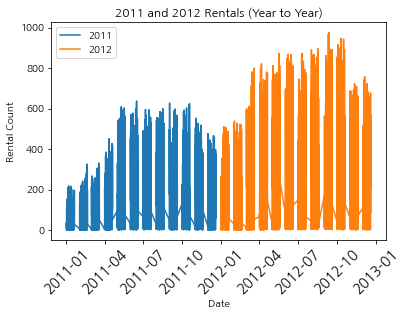

In [301]:
plt.plot(df['2011']['count'],label='2011')
plt.plot(df['2012']['count'],label='2012')
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('2011 and 2012 Rentals (Year to Year)')
plt.legend()
plt.show()

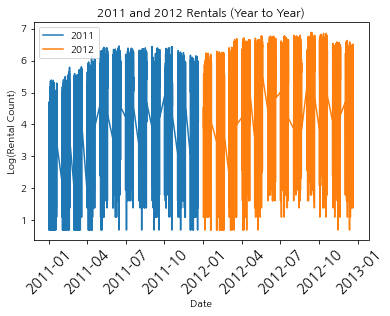

In [302]:
plt.plot(df['2011']['count'].map(np.log1p),label='2011')
plt.plot(df['2012']['count'].map(np.log1p),label='2012')
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Log(Rental Count)')
plt.title('2011 and 2012 Rentals (Year to Year)')
plt.legend()
plt.show()

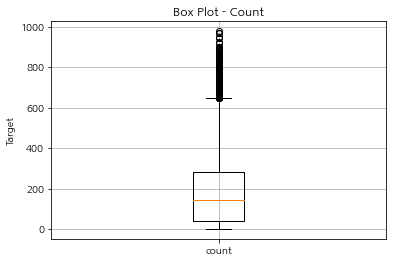

In [303]:
plt.boxplot([df['count']], labels=['count'])
plt.title('Box Plot - Count')
plt.ylabel('Target')
plt.grid(True)

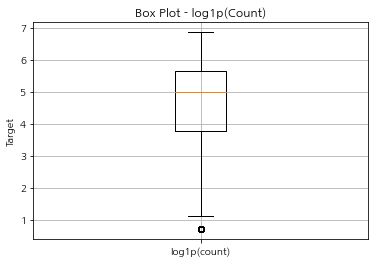

In [304]:
# Let's see how the data distribution changes with log1p
# Evenly distributed
plt.boxplot([df['count'].map(np.log1p)], labels=['log1p(count)'])
plt.title('Box Plot - log1p(Count)')
plt.ylabel('Target')
plt.grid(True)

In [305]:
df["count"] = df["count"].map(np.log1p)

In [306]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,5,4


In [307]:
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [308]:
df.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count         float64
year            int64
month           int64
day             int64
dayofweek       int64
hour            int64
dtype: object

In [309]:
# Save all data
df.to_csv('bike_all.csv',index=True,index_label='datetime',columns=columns)

In [310]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.loc[l]

In [311]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows-train

In [312]:
rows, train, test

(10886, 7620, 3266)

In [313]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [314]:
# Write Training Set
df.iloc[:train].to_csv('bike_train.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [315]:
# Write Validation Set
df.iloc[train:].to_csv('bike_validation.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [316]:
# Test Data has only input features
df_test.to_csv('bike_test.csv',index=True,index_label='datetime')

In [317]:
print(','.join(columns))

count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour


In [318]:
# Write Column List
with open('bike_train_column_list.txt','w') as f:
    f.write(','.join(columns))

In [343]:
# https://keras.io/
# https://github.com/keras-team/keras/issues/2743
import sys
import numpy as np
# Set random seed
np.random.seed(0)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, KBinsDiscretizer

# Keras Library
from keras.models import Sequential
from keras.layers import Dense, Activation

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [320]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [321]:
# One Hot Encode all Categorical Features
# Let's define all the categorical features
categorical_features = ['season','holiday','workingday','weather','year','month','dayofweek','hour']

# Separated day
categorical_day = ['day']

# Standardize Features
standardize_features = ['temp', 'atemp', 'humidity', 'windspeed']

In [322]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [323]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [324]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,4.477337,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,5.517453,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,5.814131,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,6.436150,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,4.262680,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [325]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [326]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [327]:
colTransformer = ColumnTransformer([('onehot',
                                     OneHotEncoder(categories='auto',sparse=False),
                                     categorical_features),
                                    ('onehotday',
                                     OneHotEncoder(categories=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
                                                   sparse=False),
                                     ['day']),
                                    ('standardize',
                                    StandardScaler(),standardize_features)
                                   ],
                                   remainder="passthrough")

In [328]:
colTransformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(sparse=False),
                                 ['season', 'holiday', 'workingday', 'weather',
                                  'year', 'month', 'dayofweek', 'hour']),
                                ('onehotday',
                                 OneHotEncoder(categories=[[1, 2, 3, 4, 5, 6, 7,
                                                            8, 9, 10, 11, 12,
                                                            13, 14, 15, 16, 17,
                                                            18, 19, 20, 21, 22,
                                                            23, 24, 25, 26, 27,
                                                            28, 29, 30, ...]],
                                               sparse=False),
                                 ['day']),
                                ('standardize', StandardScaler(),
                                 ['t

In [329]:
X_train_encoded = colTransformer.transform(X_train)
X_validation_encoded = colTransformer.transform(X_validation)

In [330]:
print('Training Data',X_train.shape, 'OneHot Encoded',X_train_encoded.shape)
print('Val Data',X_validation.shape, 'OneHot Encoded',X_validation_encoded.shape)

Training Data (7620, 13) OneHot Encoded (7620, 92)
Val Data (3266, 13) OneHot Encoded (3266, 92)


In [331]:
X_train_encoded[:1]

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [332]:
X_validation_encoded[:1]

array([[0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [333]:
# Dimension of input data
# We need to specify number of features when configuring the first hidden layer
X_train_encoded.shape

(7620, 92)

In [334]:
model = Sequential()
# 1 hidden layer with 100 neurons with relu activation
# output layer - regression, so no activation
model.add(Dense(100, input_dim=X_train_encoded.shape[1],activation='relu'))
model.add(Dense(1,activation=None))

In [335]:
# Need to compile the model, specify the optimizer and loss function to use
# For a mean squared error regression problem
model.compile(optimizer= Adam(learning_rate=0.001),
              loss='mse')

In [336]:
from keras.callbacks import EarlyStopping

In [337]:
# We can optionally configure early stopping to prevent overfitting - stop when validation loss does not improve
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [338]:
history = model.fit(X_train_encoded, y_train, epochs=20, batch_size=32, 
          validation_data=(X_validation_encoded,y_validation),callbacks=[early_stopping])

Epoch 1/100
239/239 [==============================] - 0s 943us/step - loss: 2.4858 - val_loss: 0.5113
Epoch 2/100
239/239 [==============================] - 0s 702us/step - loss: 0.3838 - val_loss: 0.3177
Epoch 3/100
239/239 [==============================] - 0s 714us/step - loss: 0.2695 - val_loss: 0.2346
Epoch 4/100
239/239 [==============================] - 0s 712us/step - loss: 0.1788 - val_loss: 0.1453
Epoch 5/100
239/239 [==============================] - 0s 748us/step - loss: 0.1154 - val_loss: 0.1072
Epoch 6/100
239/239 [==============================] - 0s 704us/step - loss: 0.0943 - val_loss: 0.1015
Epoch 7/100
239/239 [==============================] - 0s 702us/step - loss: 0.0859 - val_loss: 0.1018
Epoch 8/100
239/239 [==============================] - 0s 723us/step - loss: 0.0816 - val_loss: 0.0963
Epoch 9/100
239/239 [==============================] - 0s 710us/step - loss: 0.0786 - val_loss: 0.0902
Epoch 10/100
239/239 [==============================] - 0s 723us/step - l

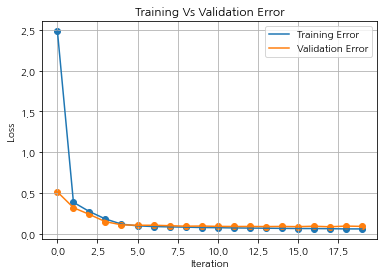

In [339]:
plt.scatter(x=history.epoch,y=history.history['loss'])
plt.scatter(x=history.epoch,y=history.history['val_loss'])

plt.plot(history.history['loss'],label='Training Error')
plt.plot(history.history['val_loss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()



In [340]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               9300      
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 9,401
Trainable params: 9,401
Non-trainable params: 0
_________________________________________________________________


In [346]:
y_pred = model.predict(X_validation_encoded)
R2 = r2_score(y_pred, y_validation)

print(R2)

0.9537950617104594


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 73)]              0         
                                                                 
 dense_8 (Dense)             (None, 128)               9472      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 26,113
Trainable params: 26,113
Non-trainable p

Epoch 71/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0402 - val_loss: 0.0588
Epoch 72/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0397 - val_loss: 0.0585
Epoch 73/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0399 - val_loss: 0.0587
Epoch 74/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0419 - val_loss: 0.0585
Epoch 75/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0418 - val_loss: 0.0589
Epoch 76/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0409 - val_loss: 0.0579
Epoch 77/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0406 - val_loss: 0.0585
Epoch 78/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0390 - val_loss: 0.0581
Epoch 79/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0381 - val_loss: 0.0582
Epoch 80/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0376 - val_loss: 0.0555


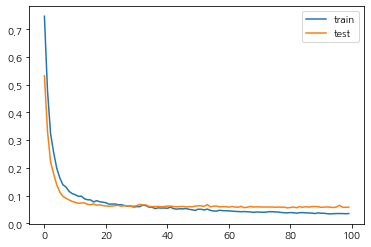

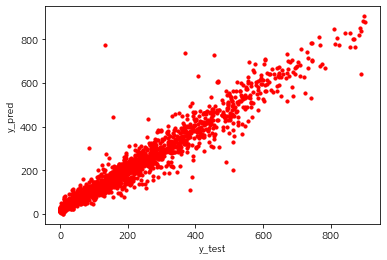

R2 score = 0.9426


In [348]:
# 자전거 대여 횟수 추정. Bike sharing demend
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

DATA_PATH = 'C:\\Users\\배진우\\Documents\\multiCampus_TA\\python_data\\'
df = pd.read_csv(DATA_PATH + 'bike-sharing-demand/train.csv')
# df.info()

df.head()

# datetime을 년, 월, 일, 시간 컬럼으로 분리
df['datetime'] = df['datetime'].apply(pd.to_datetime)
df['year'] = df['datetime'].apply(lambda x: x.year)
df['month'] = df['datetime'].apply(lambda x: x.month)
df['day'] = df['datetime'].apply(lambda x: x.day)
df['hour'] = df['datetime'].apply(lambda x: x.hour)

# 불필요한 컬럼 삭제
df = df.drop(['datetime', 'casual', 'registered'], axis=1)

# 학습 데이터. Feature data를 두 부분으로 나눠서 처리.
ohe_feat = ['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'] # one-hot 변환 대상
std_feat = ['temp', 'atemp', 'humidity', 'windspeed']  # normalization 대상

x_feat1 = np.array(pd.get_dummies(df[ohe_feat], columns=ohe_feat))
x_feat2 = np.array(df[std_feat])
y_target = np.array(df['count']).reshape(-1, 1)

# 학습 데이터와 시험 데이터 분리
x_train1, x_test1, x_train2, x_test2, y_train, y_test = train_test_split(
    x_feat1, x_feat2, y_target, test_size=0.2)
x_train1.shape, x_test1.shape, x_train2.shape, x_test2.shape, y_train.shape, y_test.shape

# 데이터 표준화
# feature data 표준화
xf_mu = x_train2.mean(axis=0)
xf_sd = x_train2.std(axis=0)

x_train2_std = (x_train2 - xf_mu) / xf_sd
x_test2_std = (x_test2 - xf_mu) / xf_sd      # train data의 평균, 표준편차 사용

# target data 표준화
yt_mu = y_train.mean()
yt_sd = y_train.std()

y_train = (y_train - yt_mu) / yt_sd
y_test = (y_test - yt_mu) / yt_sd

# 분리된 2개의 feature data를 하나로 합친다.
x_train = np.hstack([x_train1, x_train2_std])
x_test = np.hstack([x_test1, x_test2_std])
x_train.shape, x_test.shape, y_train.shape, y_test.shape

n_hLayer = 2
n_hNeuron = 128

xInput = Input(batch_shape=(None, x_train.shape[1]))
hLayer = Dense(n_hNeuron, activation='relu')(xInput)
hLayer = Dropout(rate = 0.2)(hLayer)

for i in range(n_hLayer - 1):
    hLayer = Dense(n_hNeuron, activation='relu')(hLayer)
    hLayer = Dropout(rate = 0.2)(hLayer)
    
yOutput = Dense(1)(hLayer)

model = Model(xInput, yOutput)
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
model.summary()

hist = model.fit(x_train, y_train,
                 batch_size = 256,
                 epochs = 100,
                 validation_data = (x_test, y_test))

# loss 확인
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

y_pred = model.predict(x_test)

y_pred_org = (y_pred * yt_sd + yt_mu).reshape(-1,)  # 표준화 이전 값으로 복원한다.
y_test_org = (y_test * yt_sd + yt_mu).reshape(-1,)

# 추정결과를 육안으로 확인한다.
result = pd.DataFrame({'y_test': y_test_org, 'y_pred': y_pred_org})
result.head()

# 추정치가 음수가 나온 경우 육안 확인
result[result['y_pred'] < 0]

# 추정치가 음수가 나온 경우는 y_train의 최솟값으로 치환
y_train_org = y_train * yt_sd + yt_mu
idx = np.where(y_pred_org < 0)[0]
y_pred_org[idx] = y_train_org.min()

# 추정결과를 육안으로 확인한다.
result = pd.DataFrame({'y_test': y_test_org, 'y_pred': y_pred_org})
result.head()

# 추정 결과를 산포도로 확인한다.
plt.scatter(y_test_org, y_pred_org, marker='o', s=10, c='red')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

print('R2 score = {:.4f}'.format(r2_score(y_test_org, y_pred_org)))
